# UTS Machine Learning_K-Means_Clustering_Youtubers Statistics
---


Nama : Fakhrity Hikmawan<br>
NIM : 1103204074<br>
Kelas : TK-44-G4<br>


---


Dataset: [Top 1000 Youtubers statistics](https://www.kaggle.com/datasets/computingvictor/top1000youtubers)<br>
Model: K-Means Clustering


---





```
# Prompt: Beri kode untuk menghubungkan folder didalam Google Collab dengan Google Drive
```



In [1]:
# Mengimpor modul drive dari pustaka Google Colab
from google.colab import drive

# Menghubungkan Google Colab dengan Google Drive
drive.mount('/content/drive')

Mounted at /content/drive




```
# Prompt: Beri kode untuk membaca dataset dan mengubah dataset sebagai dataframe
```



In [2]:
# Mengimpor library pandas dan memberikan alias sebagai pd
import pandas as pd

# Membaca file CSV dari Google Drive dan menyimpannya ke dalam variabel 'df'
df = pd.read_csv('/content/drive/MyDrive/DATASET/youtubers_df.csv')

# Menampilkan beberapa baris pertama dari DataFrame untuk memeriksa
df.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


Output: Menampilkan 9 baris kolom dari dataset Youtubers Statistics

# EDA
EDA, atau Exploratory Data Analysis, adalah suatu pendekatan dalam analisis data yang bertujuan untuk memahami karakteristik dasar dari dataset yang digunakan. Dalam konteks machine learning, EDA sangat penting karena membantu pemahaman awal terhadap data, memastikan kualitas data, dan mengidentifikasi pola atau tren yang mungkin relevan untuk pemodelan.

In [3]:
# Menampilkan informasi ringkas tentang dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        1000 non-null   int64  
 1   Username    1000 non-null   object 
 2   Categories  694 non-null    object 
 3   Suscribers  1000 non-null   float64
 4   Country     1000 non-null   object 
 5   Visits      1000 non-null   float64
 6   Likes       1000 non-null   float64
 7   Comments    1000 non-null   float64
 8   Links       1000 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 70.4+ KB


Output: Menampilkan info mengenai 1000 data yang terdapat pada dataset (dimulai dari 0) dan menampilkan 9 kolom dengan tipe data float, integer, dan object

In [4]:
# Mendapatkan statistik deskriptif dari dataset
df.describe()

,Rank,Suscribers,Visits,Likes,Comments
count,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,500.500000,2.189440e+07,1.209446e+06,5.363259e+04,1288.768000
std,288.819436,1.682775e+07,5.229942e+06,2.580457e+05,6778.188308
min,1.000000,1.170000e+07,0.000000e+00,0.000000e+00,0.000000
25%,250.750000,1.380000e+07,3.197500e+04,4.717500e+02,2.000000
50%,500.500000,1.675000e+07,1.744500e+05,3.500000e+03,67.000000
75%,750.250000,2.370000e+07,8.654750e+05,2.865000e+04,472.000000
max,1000.000000,2.495000e+08,1.174000e+08,5.300000e+06,154000.000000


Output: Menampilkan informasi statistik secara deskriptif berupa count, mean, std, min dan max pada dataset sebelumnya

In [6]:
# Menampilkan jumlah nilai null dalam setiap kolom
df.isnull().sum()

Rank            0
Username        0
Categories    306
Suscribers      0
Country         0
Visits          0
Likes           0
Comments        0
Links           0
dtype: int64

Output: Pada kolom Categories terdapat nilai null sebanyak 306 data

In [8]:
# Menghapus baris yang memiliki nilai null
df.dropna(inplace=True)

Output: Melakukan penghapusan pada baris yang memiliki nilai null

In [9]:
# Mengecek kembali nilai yang hilang di setiap kolom
df.isnull().sum()

Rank          0
Username      0
Categories    0
Suscribers    0
Country       0
Visits        0
Likes         0
Comments      0
Links         0
dtype: int64

Output: Melakukan pengecekan apakah masih ada data yang memiliki nilai null

In [11]:
# Mengganti nama kolom 'Suscribers' menjadi 'Subscribers' pada DataFrame 'df'
df.rename(columns={'Suscribers': 'Subscribers'}, inplace=True)

# Menampilkan beberapa baris pertama dari DataFrame untuk memeriksa
print(df.head())

   Rank       Username              Categories  Subscribers         Country  \
0     1        tseries          Música y baile  249500000.0           India   
1     2        MrBeast      Videojuegos, Humor  183500000.0  Estados Unidos   
2     3      CoComelon               Educación  165500000.0         Unknown   
4     5  KidsDianaShow     Animación, Juguetes  113500000.0         Unknown   
5     6      PewDiePie  Películas, Videojuegos  111500000.0  Estados Unidos   

        Visits      Likes  Comments  \
0      86200.0     2700.0      78.0   
1  117400000.0  5300000.0   18500.0   
2    7000000.0    24700.0       0.0   
4    3900000.0    12400.0       0.0   
5    2400000.0   197300.0    4900.0   

                                               Links  
0  http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...  
1  http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...  
2  http://youtube.com/channel/UCbCmjCuTUZos6Inko4...  
4  http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...  
5  http://youtu

Output: Dataset pada kolom 'Suscribers' sebelumnya sudah berganti nama menjadi 'Subscribers'

In [12]:
# Menghapus kolom 'Categories' dan 'Country' dari DataFrame 'df'
df.drop(['Categories', 'Country'], axis=1, inplace=True)

# Menampilkan beberapa baris pertama dari DataFrame untuk memeriksa
print(df.head())

   Rank       Username  Subscribers       Visits      Likes  Comments  \
0     1        tseries  249500000.0      86200.0     2700.0      78.0   
1     2        MrBeast  183500000.0  117400000.0  5300000.0   18500.0   
2     3      CoComelon  165500000.0    7000000.0    24700.0       0.0   
4     5  KidsDianaShow  113500000.0    3900000.0    12400.0       0.0   
5     6      PewDiePie  111500000.0    2400000.0   197300.0    4900.0   

                                               Links  
0  http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...  
1  http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...  
2  http://youtube.com/channel/UCbCmjCuTUZos6Inko4...  
4  http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...  
5  http://youtube.com/channel/UC-lHJZR3Gqxm24_Vd_...  


Output: Dataset pada kolom 'Categories', 'Country' sebelumnya sudah berhasil dihapus

# Data Visualization
Data visualization (visualisasi data) dalam konteks machine learning adalah proses menggambarkan informasi dan hubungan dalam data menggunakan elemen-elemen visual seperti grafik, plot, dan diagram. Tujuan utama dari data visualization dalam machine learning adalah untuk membuat pemahaman yang lebih baik tentang pola, tren, dan karakteristik data, sehingga memudahkan pengambilan keputusan yang informasional.



```
# Prompt: Beri kode untuk melakukan analisis elbow untuk menentukan jumlah optimal dari clusters menggunakan algoritma K-Means pada kolom 'Rank', 'Username', 'Suscribers', 'Visits', 'Likes', dan 'Comments'. Tampilkan hasil analisis elbow dalam bentuk grafik.
```



In [36]:
# Mengimpor pustaka Pandas untuk manipulasi dan analisis data
import pandas as pd

# Mengimpor pustaka Matplotlib untuk membuat visualisasi grafik
import matplotlib.pyplot as plt

#  Mengimpor algoritma K-Means dari pustaka scikit-learn untuk melakukan clustering
from sklearn.cluster import KMeans

# Mengimpor modul StandardScaler dari scikit-learn untuk melakukan standardisasi data
from sklearn.preprocessing import StandardScaler

# Mengimpor modul PCA (Principal Component Analysis) dari scikit-learn untuk reduksi dimensi.
from sklearn.decomposition import PCA

Output: mengimpor pustaka dan modul yang diperlukan untuk analisis data, tetapi tidak melakukan eksekusi analisis atau visualisasi.

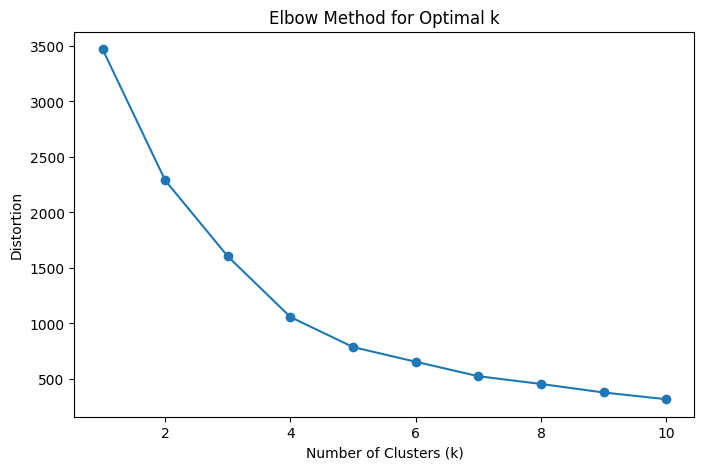

In [42]:
# Memilih kolom untuk analisis elbow
columns_to_cluster = ['Rank', 'Subscribers', 'Visits', 'Likes', 'Comments']

# Mengambil subset dataset
data_for_clustering = df[columns_to_cluster]

# Standardisasi data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

# Menentukan jumlah cluster untuk analisis elbow
distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=0)
    kmeans.fit(data_scaled)
    distortions.append(kmeans.inertia_)

# Menampilkan grafik elbow
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), distortions, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.show()


Output: Grafik yang menunjukkan nilai distorsi (inertia) terhadap jumlah cluster (k) dalam analisis elbow menggunakan algoritma K-Means. Grafik tersebut memungkinkan kita untuk menentukan jumlah optimal dari cluster berdasarkan lokasi "siku" pada kurva.

# Training with K-Means Clustering
K-Means adalah algoritma unsupervised learning yang digunakan untuk mengelompokkan data ke dalam kelompok-kelompok yang disebut cluster. Proses pelatihan di sini tidak seperti dalam supervised learning di mana model dilatih dengan menggunakan label target yang sudah diketahui. Sebaliknya, K-Means mencoba mengelompokkan data berdasarkan pola internal yang ada dalam atribut-atributnya.



```
# Prompt: Beri kode untuk melakukan K-Means clustering pada kolom 'Rank', 'Username', 'Suscribers', 'Visits', 'Likes', dan 'Comments' dengan jumlah klaster (clusters) sebanyak 5. Tambahkan kolom 'label' ke DataFrame untuk menandai klaster setiap data. Terakhir, tampilkan scatter plot hasil klastering dengan warna yang berbeda untuk setiap klaster dan tandai pusat klaster (centroids) dengan warna merah.
```



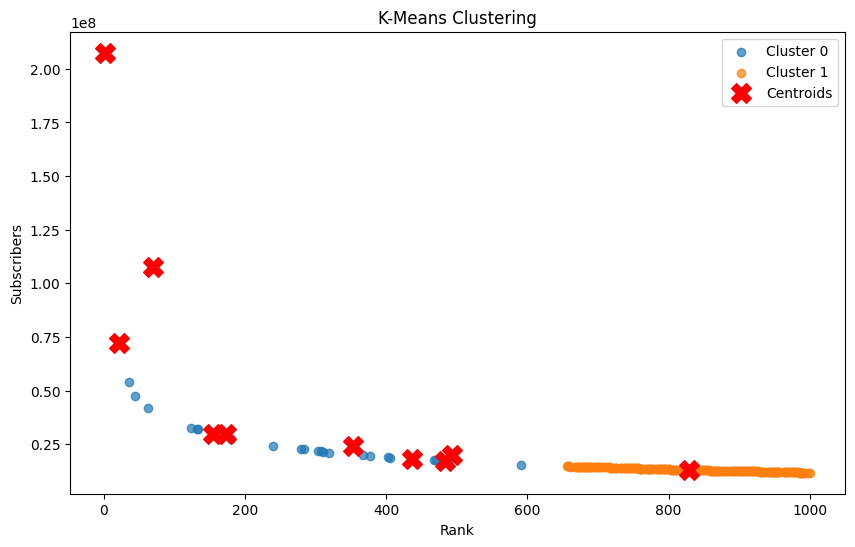

In [43]:
# Menentukan jumlah cluster
num_clusters = 2

# Mendapatkan label cluster untuk setiap data
labels = kmeans.labels_

# Menambahkan kolom 'label' ke dalam DataFrame
df['label'] = labels

# Mendapatkan pusat klaster (centroids)
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

# Menampilkan scatter plot hasil klastering
plt.figure(figsize=(10, 6))

# Scatter plot data untuk setiap klaster dengan warna yang berbeda
for label in range(num_clusters):
    cluster_data = df[df['label'] == label]
    plt.scatter(cluster_data['Rank'], cluster_data['Subscribers'], label=f'Cluster {label}', alpha=0.7)

# Plot pusat klaster (centroids) dengan warna merah
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red', label='Centroids')

plt.title('K-Means Clustering')
plt.xlabel('Rank')
plt.ylabel('Subscribers')
plt.legend()
plt.show()

Output: Scatter plot yang menunjukkan hasil klastering menggunakan algoritma K-Means pada dataset. Dua klaster ditandai dengan warna yang berbeda, dan pusat klaster (centroids) ditandai dengan marker 'X' berwarna merah. Scatter plot ini menggambarkan sebaran data pada kolom 'Rank' dan 'Subscribers' ke dalam dua klaster yang telah ditentukan oleh model K-Means.

# Evaluating with K-Means Clustering
Evaluating K-Means Clustering melibatkan penggunaan metrik tertentu untuk mengevaluasi sejauh mana model K-Means berhasil dalam mengelompokkan data menjadi klaster yang bermakna. Evaluasi dilakukan untuk memahami seberapa baik model telah mengidentifikasi pola atau struktur dalam data.

## Silhouette Score
Evaluasi K-Means menggunakan Silhouette Score dapat memberikan wawasan tentang seberapa baik objek-data berada di dalam klaster mereka sendiri dibandingkan dengan klaster tetangga terdekat. Silhouette Score berkisar dari -1 hingga 1, di mana nilai tinggi menunjukkan bahwa objek-data cukup terpisah dari klaster lainnya.



```
# Prompt: Beri kode untuk melakukan analisis Silhouette Score untuk menentukan jumlah optimal dari Clusters menggunakan algoritma K-Means pada kolom 'Rank', 'Username', 'Suscribers', 'Visits', 'Likes', dan 'Comments'. Tampilkan hasil analisis dalam bentuk grafik dan sertakan nilai Silhouette Score untuk setiap jumlah klaster.
```



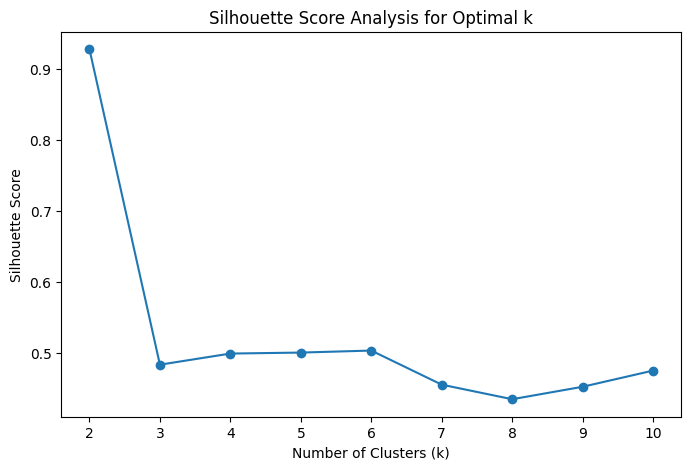

Silhouette Score for 2 Clusters: 0.9277381806756858
Silhouette Score for 3 Clusters: 0.4834388206326827
Silhouette Score for 4 Clusters: 0.49909930422024074
Silhouette Score for 5 Clusters: 0.5004944811136975
Silhouette Score for 6 Clusters: 0.5033262606829576
Silhouette Score for 7 Clusters: 0.4553001683129448
Silhouette Score for 8 Clusters: 0.4347901784903963
Silhouette Score for 9 Clusters: 0.45233693328229324
Silhouette Score for 10 Clusters: 0.4751328241558283


In [50]:
# Menyimpan nilai Silhouette Score untuk setiap jumlah cluster
silhouette_scores = []

# Melakukan analisis Silhouette Score untuk setiap jumlah cluster
for num_clusters in range_clusters:
    kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=0)
    kmeans.fit(data_scaled)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(data_scaled, labels)
    silhouette_scores.append(silhouette_avg)

# Menampilkan grafik hasil analisis Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Score Analysis for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

# Menampilkan nilai Silhouette Score untuk setiap jumlah cluster
for i, num_clusters in enumerate(range_clusters):
    print(f"Silhouette Score for {num_clusters} Clusters: {silhouette_scores[i]}")

Output: Grafik analisis Silhouette Score yang menunjukkan nilai Silhouette Score untuk setiap jumlah klaster dalam rentang yang ditentukan (2 hingga 10 klaster). Grafik ini membantu dalam menentukan jumlah optimal dari klaster dengan memperhatikan titik tertinggi pada kurva.

## Davies-Bouldin Score
Evaluasi K-Means menggunakan Davies-Bouldin Score membantu dalam menilai seberapa baik objek-data dalam suatu klaster dibandingkan dengan klaster lainnya. Davies-Bouldin Score memiliki interpretasi yang mirip dengan Silhouette Score, dan nilai rendah menunjukkan pemisahan yang lebih baik antar klaster.



```
# Prompt: Beri kode untuk melakukan analisis Davies-Bouldin Score untuk menentukan jumlah optimal dari Clusters menggunakan algoritma K-Means pada kolom 'Rank', 'Username', 'Suscribers', 'Visits', 'Likes', dan 'Comments'. Tampilkan hasil analisis dalam bentuk grafik dan sertakan nilai Davies-Bouldin Score untuk setiap jumlah klaster.
```



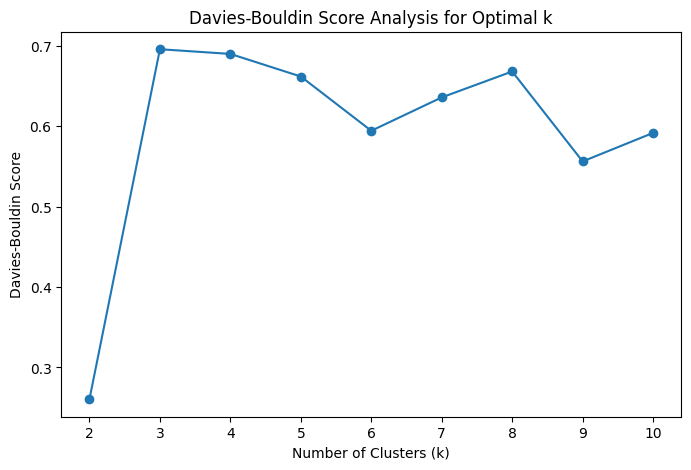

Davies-Bouldin Score for 2 Clusters: 0.2605033153172859
Davies-Bouldin Score for 3 Clusters: 0.6959501017978958
Davies-Bouldin Score for 4 Clusters: 0.6901044402098662
Davies-Bouldin Score for 5 Clusters: 0.6619961669839256
Davies-Bouldin Score for 6 Clusters: 0.5944790366919019
Davies-Bouldin Score for 7 Clusters: 0.6360092141608584
Davies-Bouldin Score for 8 Clusters: 0.6682479428735928
Davies-Bouldin Score for 9 Clusters: 0.5563643268639383
Davies-Bouldin Score for 10 Clusters: 0.5918421843499974


In [51]:
# Menyimpan nilai Davies-Bouldin Score untuk setiap jumlah cluster
davies_bouldin_scores = []

# Melakukan analisis Davies-Bouldin Score untuk setiap jumlah cluster
for num_clusters in range_clusters:
    kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=0)
    kmeans.fit(data_scaled)
    labels = kmeans.labels_
    davies_bouldin_avg = davies_bouldin_score(data_scaled, labels)
    davies_bouldin_scores.append(davies_bouldin_avg)

# Menampilkan grafik hasil analisis Davies-Bouldin Score
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, davies_bouldin_scores, marker='o')
plt.title('Davies-Bouldin Score Analysis for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Score')
plt.show()

# Menampilkan nilai Davies-Bouldin Score untuk setiap jumlah cluster
for i, num_clusters in enumerate(range_clusters):
    print(f"Davies-Bouldin Score for {num_clusters} Clusters: {davies_bouldin_scores[i]}")


Output: Grafik analisis Davies-Bouldin Score yang menunjukkan nilai Davies-Bouldin Score untuk setiap jumlah klaster dalam rentang yang ditentukan (2 hingga 10 klaster). Grafik ini membantu dalam menentukan jumlah optimal dari klaster dengan memperhatikan titik terendah pada kurva.

## Calinski-Harabasz Score
Evaluasi K-Means menggunakan Calinski-Harabasz Score membantu menilai seberapa baik pemisahan antara klaster yang ada. Calinski-Harabasz Score cenderung lebih tinggi untuk klaster yang lebih terpisah dan lebih kompak.



```
# Prompt: Beri kode untuk melakukan analisis Calinski-Harabasz Score untuk menentukan jumlah optimal dari Clusters menggunakan algoritma K-Means pada kolom 'Rank', 'Username', 'Suscribers', 'Visits', 'Likes', dan 'Comments'. Tampilkan hasil analisis dalam bentuk grafik dan sertakan nilai Calinski-Harabasz Score untuk setiap jumlah klaster.
```



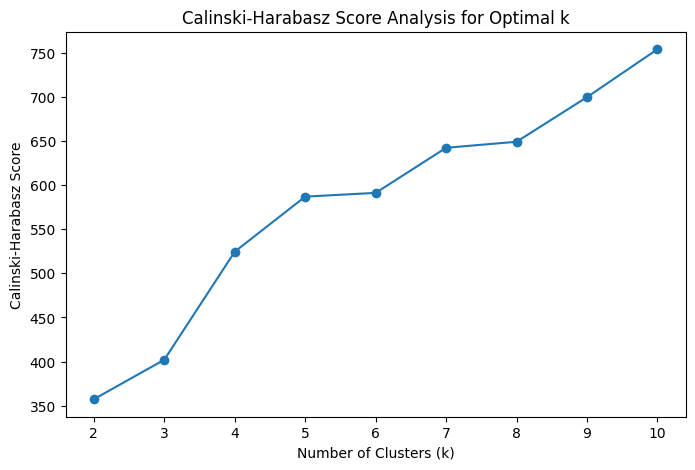

Calinski-Harabasz Score for 2 Clusters: 357.3691718895575
Calinski-Harabasz Score for 3 Clusters: 402.07263133653925
Calinski-Harabasz Score for 4 Clusters: 524.4427962123974
Calinski-Harabasz Score for 5 Clusters: 586.82506514825
Calinski-Harabasz Score for 6 Clusters: 591.0557119532211
Calinski-Harabasz Score for 7 Clusters: 642.1316679207988
Calinski-Harabasz Score for 8 Clusters: 648.9428568145233
Calinski-Harabasz Score for 9 Clusters: 699.4803533758964
Calinski-Harabasz Score for 10 Clusters: 753.7580482095037


In [52]:
# Menyimpan nilai Calinski-Harabasz Score untuk setiap jumlah cluster
calinski_harabasz_scores = []

# Melakukan analisis Calinski-Harabasz Score untuk setiap jumlah cluster
for num_clusters in range_clusters:
    kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=0)
    kmeans.fit(data_scaled)
    labels = kmeans.labels_
    calinski_harabasz_avg = calinski_harabasz_score(data_scaled, labels)
    calinski_harabasz_scores.append(calinski_harabasz_avg)

# Menampilkan grafik hasil analisis Calinski-Harabasz Score
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, calinski_harabasz_scores, marker='o')
plt.title('Calinski-Harabasz Score Analysis for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Calinski-Harabasz Score')
plt.show()

# Menampilkan nilai Calinski-Harabasz Score untuk setiap jumlah cluster
for i, num_clusters in enumerate(range_clusters):
    print(f"Calinski-Harabasz Score for {num_clusters} Clusters: {calinski_harabasz_scores[i]}")

Output: Grafik analisis Calinski-Harabasz Score yang menunjukkan nilai Calinski-Harabasz Score untuk setiap jumlah klaster dalam rentang yang ditentukan (2 hingga 10 klaster). Grafik ini membantu dalam menentukan jumlah optimal dari klaster dengan memperhatikan titik tertinggi pada kurva.

# Inputing New Data
Inputing New Data adalah proses dimana kita menyajikan data baru ke dalam model yang telah dilatih sebelumnya untuk mendapatkan prediksi atau hasil yang diinginkan. Dalam konteks clustering menggunakan algoritma K-Means, inputing new data berarti memberikan data baru ke model K-Means untuk menentukan klaster mana yang paling cocok atau sesuai dengan data tersebut. Proses ini melibatkan standardisasi data baru (jika diperlukan), dan kemudian menggunakan model K-Means untuk memprediksi klaster yang sesuai dengan data baru tersebut.



```
# Prompt: Beri kode untuk melakukan Inputing New Data menggunakan algoritma K-Means pada kolom 'Rank', 'Username', 'Suscribers', 'Visits', 'Likes', dan 'Comments'. Tampilkan hasil analisis berupa hasil prediksi.
```



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Predicted Label for New Data: 1


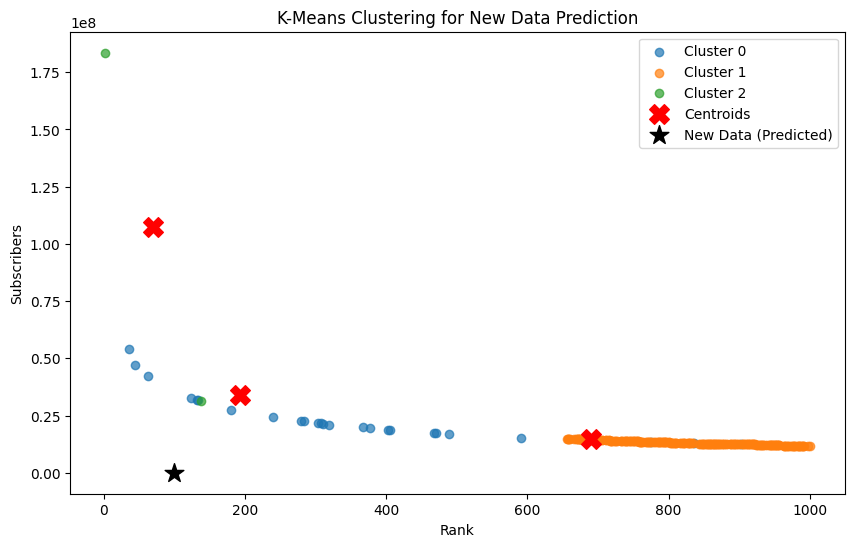

In [63]:
# Menentukan jumlah cluster yang optimal
num_clusters = 3  # Gantilah dengan jumlah cluster yang telah ditentukan

# Membuat dan melatih model K-Means
kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=0)
kmeans.fit(data_scaled)

# Data baru yang akan diprediksi
new_rank = 100
new_subscribers = 50000
new_visits = 100000
new_likes = 2000
new_comments = 500
new_data = [[new_rank, new_subscribers, new_visits, new_likes, new_comments]]

# Memberikan nama kolom pada data baru
new_data_df = pd.DataFrame(new_data, columns=['Rank', 'Subscribers', 'Visits', 'Likes', 'Comments'])

# Standardisasi data baru
new_data_scaled = scaler.transform(new_data_df)

# Melakukan prediksi klaster untuk data baru
predicted_label = kmeans.predict(new_data_scaled)

# Menampilkan hasil prediksi
print(f"Predicted Label for New Data: {predicted_label[0]}")

# Menampilkan scatter plot hasil klastering dengan data baru
plt.figure(figsize=(10, 6))

# Scatter plot data untuk setiap klaster dengan warna yang berbeda
for label in range(num_clusters):
    cluster_data = df[df['label'] == label]
    plt.scatter(cluster_data['Rank'], cluster_data['Subscribers'], label=f'Cluster {label}', alpha=0.7)

# Plot pusat klaster (centroids) dengan warna merah
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red', label='Centroids')

# Plot data baru dengan warna hitam sesuai hasil prediksi
plt.scatter(new_data[0][0], new_data[0][1], marker='*', s=200, c='black', label='New Data (Predicted)')

plt.title('K-Means Clustering for New Data Prediction')
plt.xlabel('Rank')
plt.ylabel('Subscribers')
plt.legend()
plt.show()

Output: Scatter plot hasil klastering dengan data baru. Data baru diprediksi oleh model K-Means ke dalam salah satu dari tiga klaster yang telah ditentukan sebelumnya. Scatter plot menunjukkan data dalam klaster yang berbeda dengan warna yang berbeda.